In [6]:
import numpy as np
import matplotlib.pyplot as plt

m = 100

x1 = 2*np.random.rand(m,1)

x1.shape


(100, 1)

In [7]:
x1

array([[0.51884233],
       [1.95954131],
       [1.30424486],
       [0.40586998],
       [0.88379693],
       [1.29055814],
       [1.21885569],
       [1.96609288],
       [0.78077568],
       [0.37073324],
       [0.89775563],
       [0.60683152],
       [1.08527011],
       [0.443019  ],
       [1.52335178],
       [1.26337868],
       [0.56618298],
       [0.46948449],
       [1.68135322],
       [1.97012571],
       [0.78903228],
       [1.5608244 ],
       [1.04698214],
       [1.27879293],
       [0.86069822],
       [1.68940745],
       [0.10021435],
       [1.57850108],
       [0.39453378],
       [1.68332249],
       [0.65407967],
       [1.39432244],
       [1.04368013],
       [1.65560217],
       [1.7607187 ],
       [0.53254947],
       [0.48327701],
       [1.81457705],
       [1.11173461],
       [0.31789169],
       [0.58348634],
       [0.22660983],
       [0.05139439],
       [1.85870233],
       [1.68552986],
       [1.5270869 ],
       [0.02339047],
       [1.019

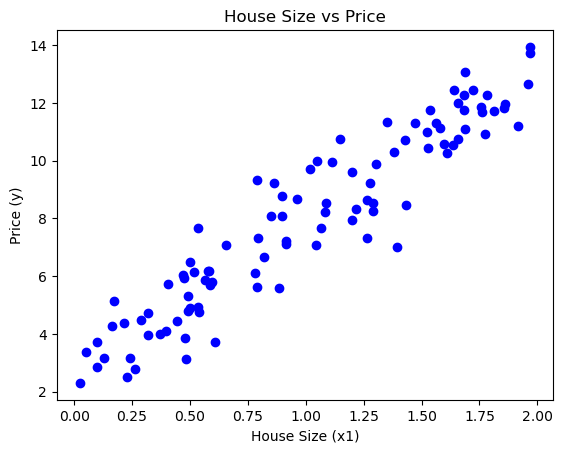

In [12]:
t0, t1 = 3, 5

y = t0 + t1*x1 + np.random.randn(m, 1) #linear regression eqn

# Visualize the data
plt.scatter(x1, y, color='blue', label='Data points')
plt.xlabel('House Size (x1)')
plt.ylabel('Price (y)')
plt.title('House Size vs Price')
plt.show()

In [14]:
x1_mean= np.mean(x1)
y_mean = np.mean(y)

# Step 2: Calculate the slope (theta_1)
numerator = np.sum((x1 - x1_mean) * (y - y_mean))
denominator = np.sum((x1 - x1_mean) ** 2)
theta_1_manual = numerator / denominator

# Step 3: Calculate the intercept (theta_0)
theta_0_manual = y_mean - (theta_1_manual * x1_mean)

In [15]:
# Print the results
print(f"Calculated theta_0 (Intercept): {theta_0_manual}")
print(f"Calculated theta_1 (Slope): {theta_1_manual}")

Calculated theta_0 (Intercept): 2.7501621911795393
Calculated theta_1 (Slope): 5.202028469389069


In [16]:
x1_test = 1.5

y_pred = theta_0_manual+theta_1_manual*x1_test
y_pred

10.553204895263143